In [1]:
% matplotlib inline
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.grid_search import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.dummy import DummyClassifier

def plot_matrix(clf, X_test, y_test):
    """Plot Confussion Matrix from a given classifier"""
    plt.clf()
    plt.imshow(confusion_matrix(y_test, clf.predict(X_test)),
               interpolation='nearest', cmap=plt.cm.binary)
    plt.colorbar()
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    plt.show()

def get_n_comp_expl_var(variance):
    """Returns PCA components needed to explain given percentage of variance"""
    for i in range(100):
        pca = PCA(n_components=i)
        pca.fit(X)
        suma = pca.explained_variance_ratio_.sum()
        if suma >= variance:
            return i, pca


In [2]:
df = pd.read_csv('../TP5/data/train.csv')

X = df.ix[:,1:-1].values
y = df['target']

le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25)

#### Establecemos un baseline con un DummyClassifier (performance pobre)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       448
          1       0.26      1.00      0.42      4058
          2       0.00      0.00      0.00      1946
          3       0.00      0.00      0.00       634
          4       0.00      0.00      0.00       690
          5       0.00      0.00      0.00      3612
          6       0.00      0.00      0.00       699
          7       0.00      0.00      0.00      2182
          8       0.00      0.00      0.00      1201

avg / total       0.07      0.26      0.11     15470

0.262314156432


/home/bruno/.virtualenvs/dss/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


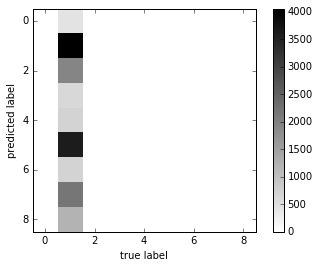

In [3]:
dummy = DummyClassifier(strategy='most_frequent',random_state=0).fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)
print classification_report(y_test, y_pred_dummy)
print dummy.score(X_test, y_test)
plot_matrix(dummy, X_test, y_test)

#### Probamos un Árbol (ETC) sin personalizar parámetros

In [ ]:
etc_1 = ExtraTreesClassifier(n_estimators=100, max_features=0.2, n_jobs=2)
etc_1.fit(X_train, y_train)
y_pred_etc_1 = etc_1.predict(X_test) 

In [ ]:
print classification_report(y_test, y_pred_etc_1)
print etc_1.score(X_test, y_test)
plot_matrix(etc_1, X_test, y_test)

#### Hacemos un GridSearch para buscar los mejores parámetros para nuestro clasificador

In [ ]:
parameters = {'max_features':np.arange(0.02,0.5,0.1), 'n_estimators':[100,400]}
#clf = ExtraTreesClassifier()
#clf = GridSearchCV(clf, parameters)
#clf.fit(X_train, y_train)
#print clf.best_score_
#print clf.best_params_

#### Creamos un clasificador con los parámetros indicados por el GridSearch 
#### {'max_features': 0.42000000000000004, 'n_estimators': 400}

In [ ]:
#This one takes a while
#etc_2 = ExtraTreesClassifier(max_features=0.42, n_estimators=400, n_jobs=2) # score = 0.82 - Mas tiempo de proc.
etc_2 = ExtraTreesClassifier(max_features=0.42, n_estimators=100, n_jobs=2) # score = 0.81 - Menos tiempo de proc.
etc_2.fit(X_train, y_train)
y_pred_etc_2 = etc_2.predict(X_test)

In [ ]:
print classification_report(y_pred_etc_2, y_test)
print etc_2.score(X_test, y_test)
plot_matrix(etc_2, X_test, y_test)

#### Features más relevantes

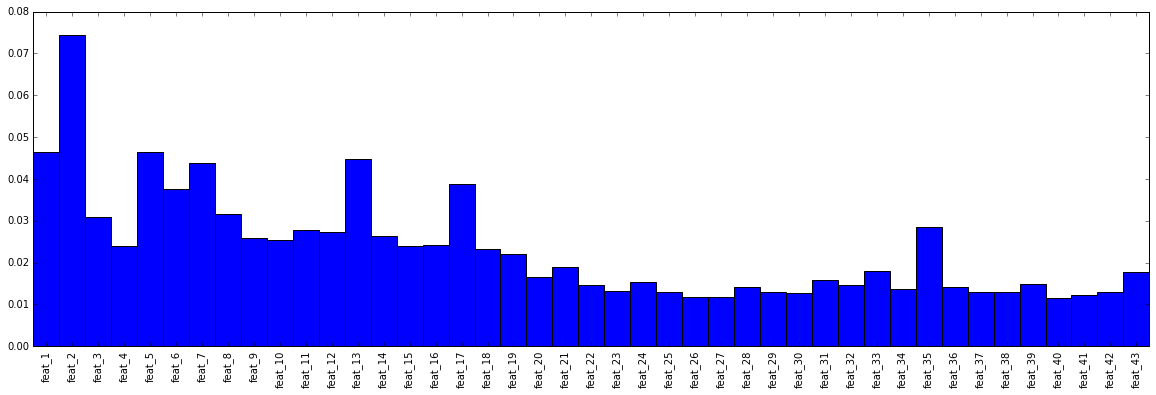

0.074272115381 feat_2
0.0464276170379 feat_1
0.0464203119384 feat_5
0.0447493900466 feat_13
0.043740813392 feat_7
0.0388520653283 feat_17
0.0376498647213 feat_6
0.031593454276 feat_8
0.0307817396893 feat_3
0.0285678556909 feat_35
0.0278829785871 feat_11
0.027290805223 feat_12
0.0263674417525 feat_14
0.0259023858209 feat_9
0.0254801306576 feat_10
0.0242927347117 feat_16
0.0239006100058 feat_15
0.0238615929963 feat_4
0.0231991338905 feat_18
0.0221495711354 feat_19
0.0189576078344 feat_21
0.01796515836 feat_33
0.0176530045604 feat_43
0.0164456134212 feat_20
0.0158815800632 feat_31
0.0154537385786 feat_24
0.014864496117 feat_39
0.0146935491763 feat_22
0.0146187131672 feat_32
0.0141149400896 feat_36
0.0141037389955 feat_28
0.0138103096893 feat_34
0.01317542405 feat_23
0.0130935416716 feat_37
0.0130430054684 feat_29
0.0129979575045 feat_38
0.0129142135368 feat_42
0.0128621271748 feat_25
0.012735939651 feat_30
0.0122103098188 feat_41
0.0117188962375 feat_26
0.0117076965726 feat_27
0.011595825

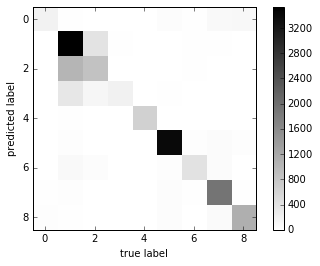

In [15]:
#n_components = 27 #explicamos el 80% de la variabilidad
n_components = 43 #explicamos el 90% de la variabilidad
pca = PCA(n_components=n_components)
pca.fit(X)
X_pca = pca.transform(X)

X_pca_scaler = preprocessing.MinMaxScaler()
X_pca_scaled = X_pca_scaler.fit_transform(X_pca)

X_train, X_test, y_train, y_test = train_test_split(X_pca_scaled.astype(np.float32), 
                                                    y_encoded, test_size=0.25)

etc_3 = ExtraTreesClassifier(max_features=0.42, n_estimators=400, n_jobs=2)
etc_3.fit(X_train, y_train)
y_pred_etc_3 = etc_3.predict(X_test)

importances = etc_3.feature_importances_

text = map(lambda i: df.columns[1:-1][i], range(n_components))
plt.figure(figsize=(20, 6))
plt.bar(range(n_components), height=importances,  width=1.)
plt.xticks(np.arange(0.5, n_components, 1.), text, rotation=90)
plt.xlim((0, n_components))
plt.show()

indices = np.argsort(importances)[::-1]
for i in range(n_components):
    print importances[indices[i]], df.columns[1:-1][indices[i]]
    
print classification_report(y_pred_etc_3, y_test)
print etc_3.score(X_test, y_test) #100 estimadores = 0.78 - 400 estimadores = 0.79
plot_matrix(etc_3, X_test, y_test)

#### Nos quedamos con las que explican el 90% de la variabilidad para analizarlas mejor

In [16]:
new_X_idx = []
for i in range(n_components):
    new_X_idx.append(df.columns[1:-1][indices[i]])

new_X = df[new_X_idx]
print new_X.columns

Index([u'feat_2', u'feat_1', u'feat_5', u'feat_13', u'feat_7', u'feat_17',
       u'feat_6', u'feat_8', u'feat_3', u'feat_35', u'feat_11', u'feat_12',
       u'feat_14', u'feat_9', u'feat_10', u'feat_16', u'feat_15', u'feat_4',
       u'feat_18', u'feat_19', u'feat_21', u'feat_33', u'feat_43', u'feat_20',
       u'feat_31', u'feat_24', u'feat_39', u'feat_22', u'feat_32', u'feat_36',
       u'feat_28', u'feat_34', u'feat_23', u'feat_37', u'feat_29', u'feat_38',
       u'feat_42', u'feat_25', u'feat_30', u'feat_41', u'feat_26', u'feat_27',
       u'feat_40'],
      dtype='object')


#### Estandarizamos y normalizamos los datos

In [17]:
X_scaler = preprocessing.MinMaxScaler()
#y_scaler = preprocessing.StandardScaler()

new_X_scaled = X_scaler.fit_transform(new_X.values.astype(np.float32))
#new_y_scaled = y_scaler.fit_transform(y_encoded)

#### Dividimos nuevamente los datos

In [18]:
X_train, X_test, y_train, y_test = train_test_split(new_X_scaled, y_encoded.astype(np.int32), test_size=0.25)

#### Creamos un nuevo Clasificador (usando los parametros de GridSearch)

In [19]:
etc_4 = ExtraTreesClassifier(max_features=0.42, n_estimators=400, n_jobs=2)
etc_4.fit(X_train, y_train)
y_pred_etc_4 = etc_4.predict(X_test)

#### Analizamos su performance

             precision    recall  f1-score   support

          0       0.32      0.65      0.43       229
          1       0.83      0.69      0.76      4863
          2       0.46      0.55      0.50      1581
          3       0.40      0.68      0.50       392
          4       0.95      0.96      0.95       660
          5       0.93      0.88      0.90      3664
          6       0.48      0.74      0.58       478
          7       0.86      0.80      0.83      2387
          8       0.78      0.81      0.79      1216

avg / total       0.79      0.76      0.77     15470

0.760892049127


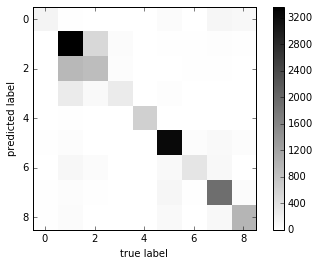

In [20]:
print classification_report(y_pred_etc_4, y_test)
print etc_4.score(X_test, y_test) #100 estimadores = 0.76 - 400 estimadores = 0.76
plot_matrix(etc_4, X_test, y_test)